In [26]:
import pandas as pd
import seaborn as sns

In [27]:
data = pd.read_csv('data/health.csv')
data = data.drop(columns = ['Unnamed: 0'])

In [28]:
data.columns

Index(['index', 'SNRLGSVC', 'SNRLGIMP', 'SNRLDCSN', 'SNRLFRND', 'YEAR',
       'CASEID', 'Tabacco_Flag', 'Alcohol_Flag', 'Marijunana_Flag',
       'Marijuana_Only_Flag', 'Cocaine_Flag', 'Crack_Flag', 'Herion_Flag',
       'Hallcinogens_Flag', 'Inhalants_Flag', 'Painkiller_Flag',
       'Tranquilizer_Flag', 'Stimulant Flag', 'CPN_Meth_Flag', 'Meth_Flag',
       'Sedatives Flag', 'Any_Drug_Flag', 'Any_Drug_Past_Year',
       'Any_Drug_Past_Month', 'Age_First_Use', 'Year_First_Use',
       'Drug_Not_Marijunana', 'Ever_Steal_50', 'Sell_Illegal_Drugs',
       'Ever_Booked_Arrested', 'Drug_or_Alc_Past_year', 'inpatient',
       'outpatient', 'needed_not_rcvd', 'rcvd_any_tmt',
       'suic_thought_pst_12month', 'psych_distress_month', 'psych_distress_yr',
       'suic_thought_pst_yr', 'suic_plan', 'suic_attempt', 'whodas_score',
       'predicted_ment_ill', 'svrl_days_depressed', 'lifetime_mde',
       'pst_yr_mde', 'CATAG6', 'HEALTH', 'IRSEX', 'IRMARIT', 'EDUCCAT2',
       'NEWRACE2', 'EMPST

In [29]:
data

,index,SNRLGSVC,SNRLGIMP,SNRLDCSN,SNRLFRND,YEAR,CASEID,Tabacco_Flag,Alcohol_Flag,Marijunana_Flag,...,svrl_days_depressed,lifetime_mde,pst_yr_mde,CATAG6,HEALTH,IRSEX,IRMARIT,EDUCCAT2,NEWRACE2,EMPSTATY
0,0,6-24,Agree,Agree,Agree,2010,1,1,1,1,...,1.0,1.0,1.0,A-18-25,H_Very_good,Male,Not_Married,Some_college,Black/Afr_Am,E_full_time
1,1,3-5,Disagree,Disagree,Strongly Disagree,2010,2,1,1,1,...,0.0,1.0,1.0,A-18-25,H_Excellent,Female,Married,Some_college,White,E_full_time
2,2,99,99,99,99,2010,3,0,1,1,...,0.0,1.0,0.0,A-12-17,H_Good,Female,Not_Married,Edu_youth,Hispanic,E_Other
3,3,1-2,Agree,Agree,Disagree,2010,4,1,1,0,...,0.0,0.0,1.0,A-18-25,H_Fair,Female,Not_Married,Less_than_high_school,White,E_Other
4,4,6-24,Strongly Agree,Strongly Agree,Agree,2010,5,1,0,0,...,1.0,1.0,1.0,A-50-64,H_Fair,Female,Divorced_Separated,High_school_graduate,White,E_Unemployed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280320,55266,25-52,Strongly Agree,Agree,Disagree,2014,55267,1,1,0,...,1.0,1.0,1.0,A-18-25,H_Very_good,Female,Not_Married,High_school_graduate,White,E_full_time
280321,55267,3-5,Strongly Disagree,Agree,Disagree,2014,55268,0,0,0,...,0.0,0.0,0.0,A-35-49,H_Fair,Female,Divorced_Separated,High_school_graduate,White,E_Other
280322,55268,25-52,Strongly Agree,Strongly Agree,Disagree,2014,55269,1,1,1,...,1.0,1.0,1.0,A-35-49,H_Excellent,Male,Married,College_graduate,White,E_full_time
280323,55269,6-24,Agree,Agree,Strongly Disagree,2014,55270,0,0,0,...,0.0,0.0,0.0,A-18-25,H_Very_good,Female,Not_Married,Some_college,White,E_part_time


## Using the new Data (after normalize and add suicide risk)

In [3]:
new_data = pd.read_csv('data/new_health.csv')
new_data = new_data.drop(columns = ['Unnamed: 0'])

In [6]:
new_data_1 = new_data.drop(columns = ['suicide_risk'])

In [19]:
new_data_1.columns

Index(['RELIG_SERVICES_12month', 'RELIG_IMPORTANT', 'RELIG_influ_decision',
       'friend_SHARE_REL', 'Tabacco_Flag', 'Alcohol_Flag', 'Marijunana_Flag',
       'Marijuana_Only_Flag', 'Cocaine_Flag', 'Crack_Flag', 'Herion_Flag',
       'Hallcinogens_Flag', 'Inhalants_Flag', 'Painkiller_Flag',
       'Tranquilizer_Flag', 'Stimulant Flag', 'Meth_Flag', 'Sedatives Flag',
       'Any_Drug_Flag', 'Drug_Not_Marijunana', 'Ever_Steal_50',
       'Sell_Illegal_Drugs', 'Ever_Booked_Arrested', 'Drug_or_Alc_Past_year',
       'inpatient', 'outpatient', 'needed_not_rcvd', 'rcvd_any_tmt',
       'suic_thought_pst_12month', 'psych_distress_month', 'psych_distress_yr',
       'suic_thought_pst_yr', 'suic_plan', 'suic_attempt', 'whodas_score',
       'predicted_ment_ill', 'svrl_days_depressed', 'lifetime_mde',
       'pst_yr_mde', 'age', 'HEALTH', 'IRSEX', 'IRMARIT', 'EDUCCAT2',
       'NEWRACE2', 'EMPSTATY'],
      dtype='object')

In [7]:
from matplotlib import pyplot as plt
import numpy as np

<AxesSubplot:>

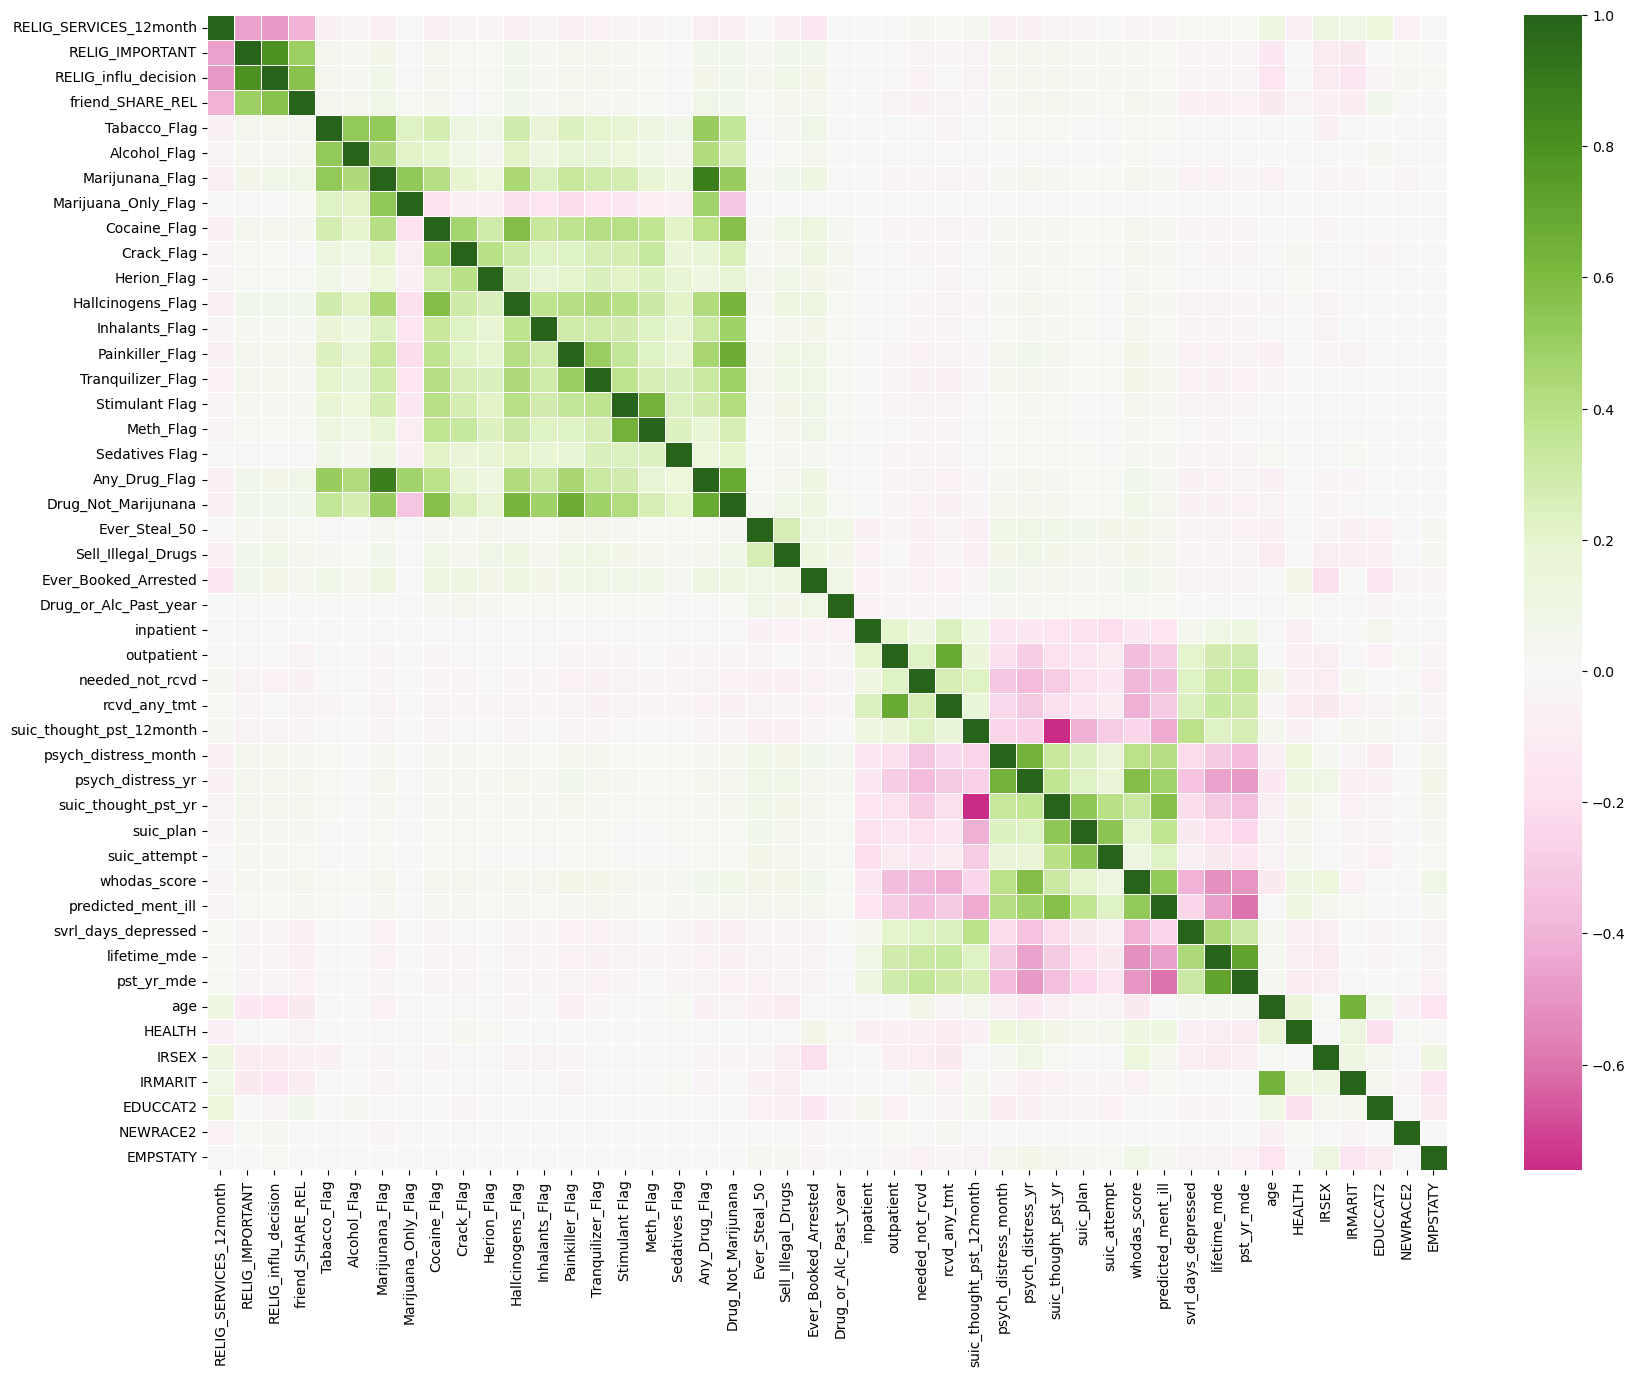

In [22]:
plt.subplots(figsize=(20,15))
sns.heatmap(new_data_1.corr(), center = 0, linewidths = 0.5, cmap="PiYG")

<AxesSubplot:>

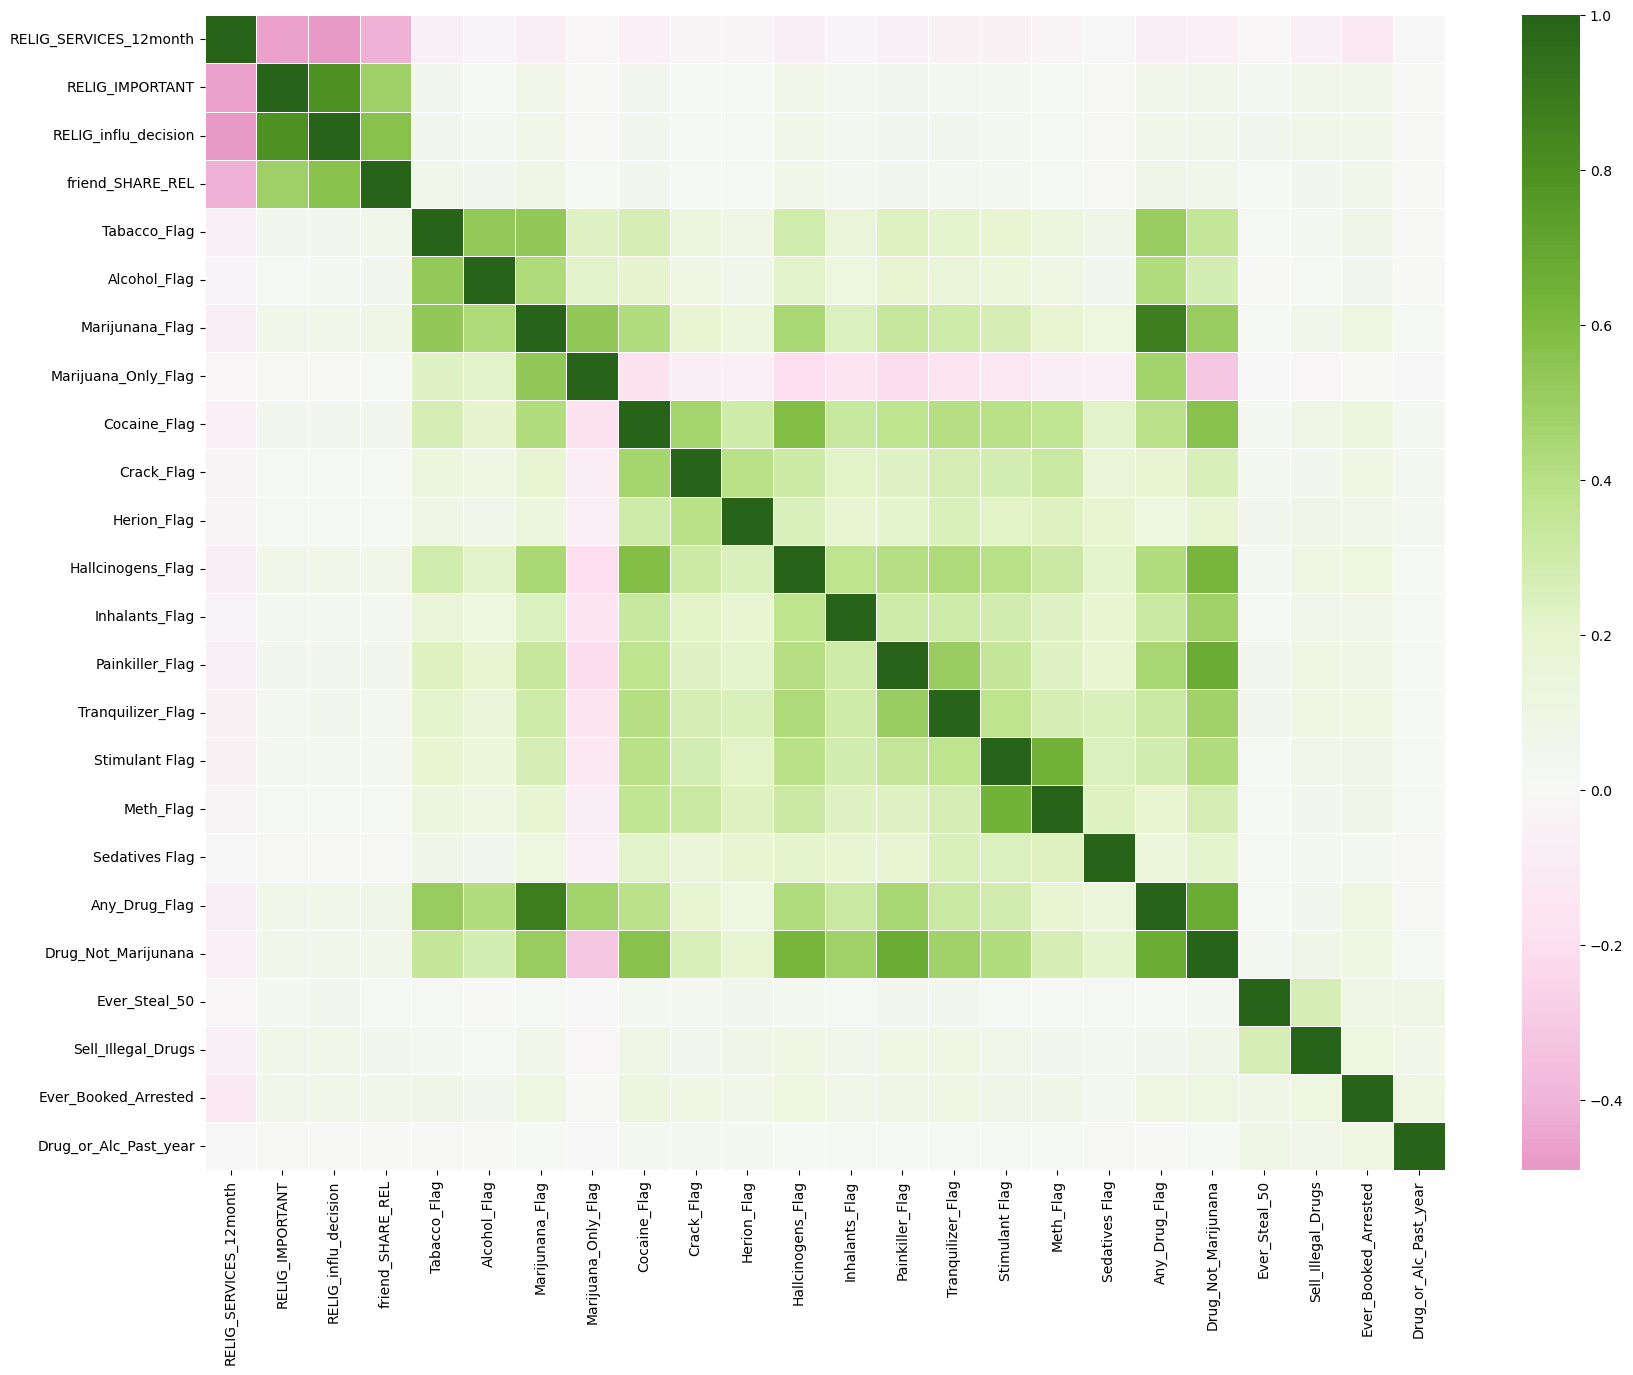

In [23]:
sub1 = new_data_1[['RELIG_SERVICES_12month', 'RELIG_IMPORTANT', 'RELIG_influ_decision',
       'friend_SHARE_REL', 'Tabacco_Flag', 'Alcohol_Flag', 'Marijunana_Flag',
       'Marijuana_Only_Flag', 'Cocaine_Flag', 'Crack_Flag', 'Herion_Flag',
       'Hallcinogens_Flag', 'Inhalants_Flag', 'Painkiller_Flag',
       'Tranquilizer_Flag', 'Stimulant Flag', 'Meth_Flag', 'Sedatives Flag',
       'Any_Drug_Flag', 'Drug_Not_Marijunana', 'Ever_Steal_50',
       'Sell_Illegal_Drugs', 'Ever_Booked_Arrested', 'Drug_or_Alc_Past_year']]
plt.subplots(figsize=(20,15))
sns.heatmap(sub1.corr(), center = 0, linewidths = 0.5, cmap="PiYG")

<AxesSubplot:>

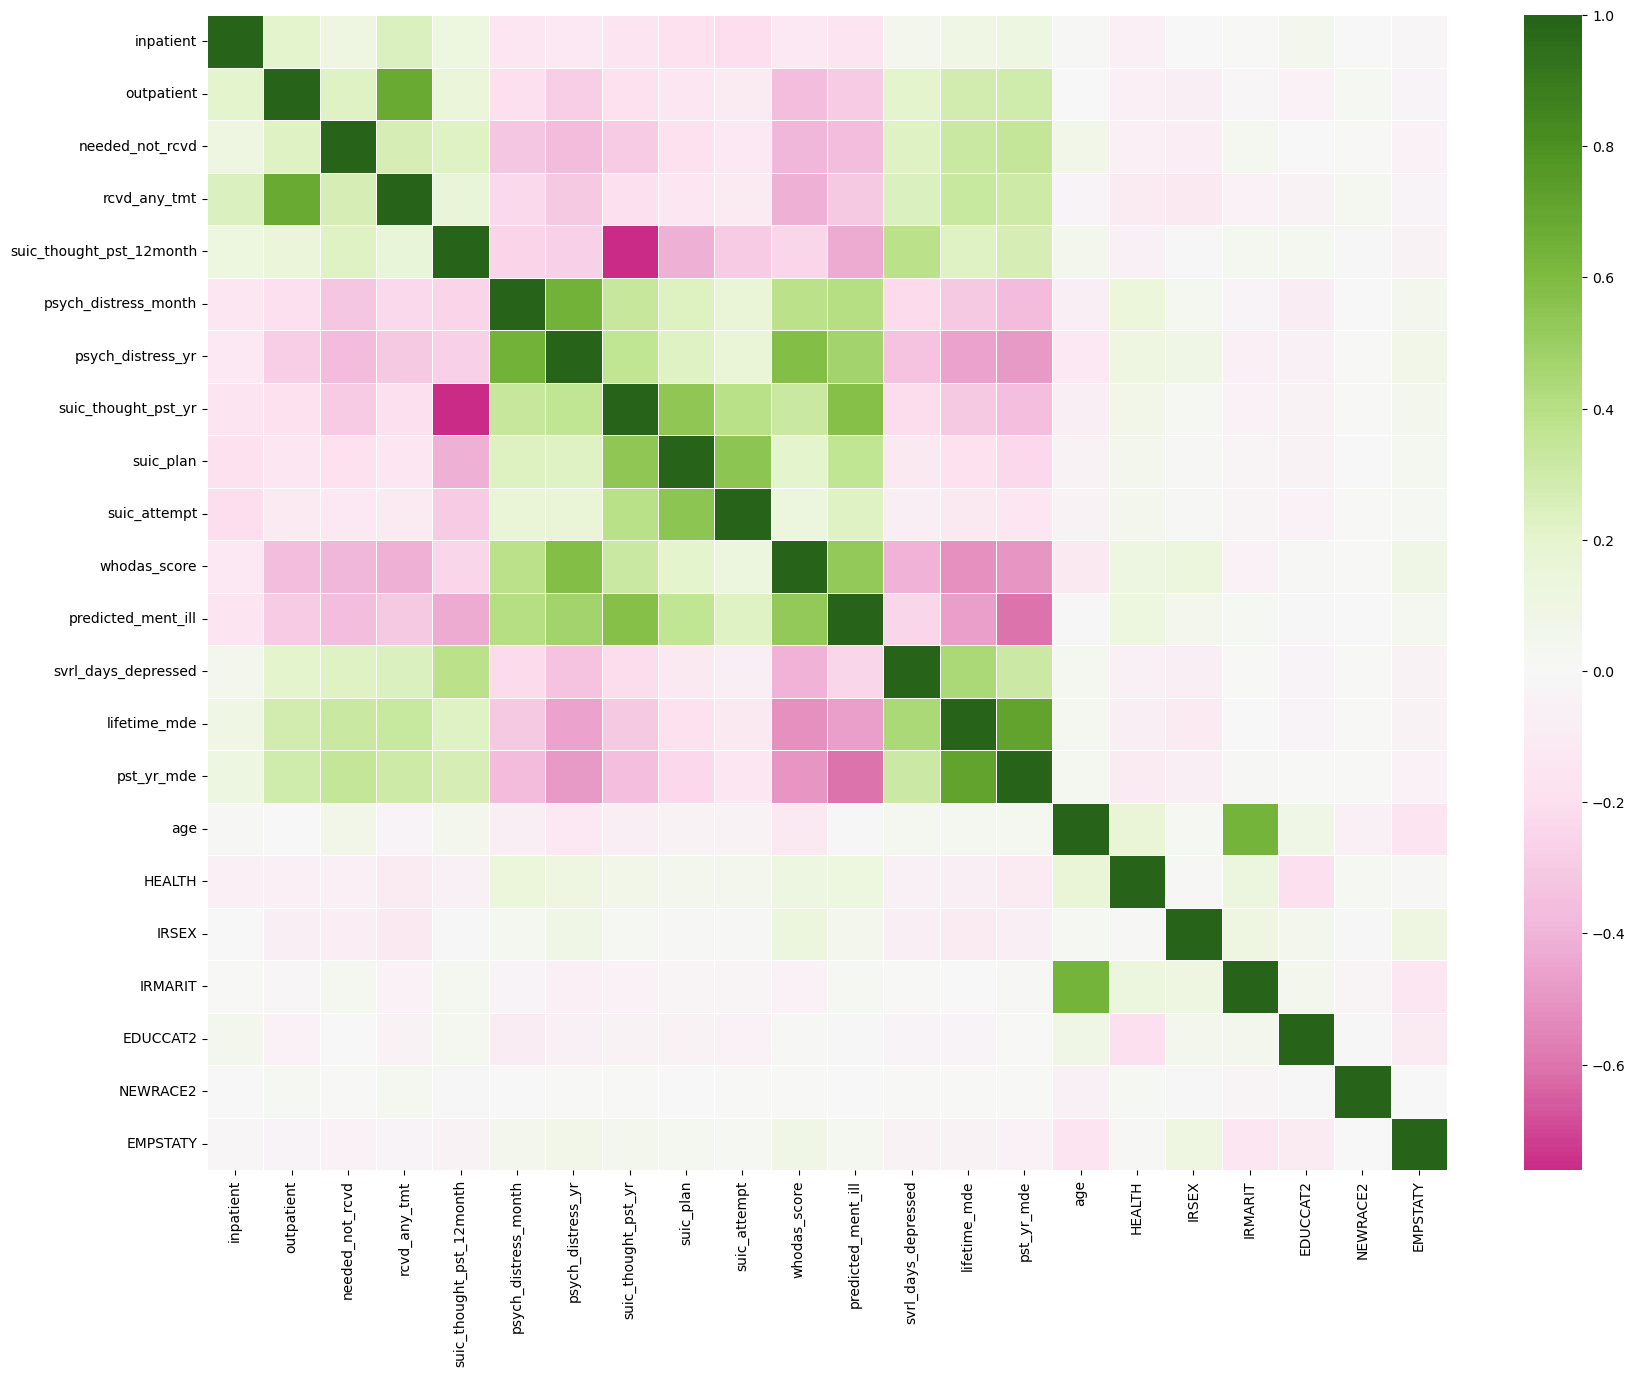

In [24]:
sub2 = new_data_1[['inpatient', 'outpatient', 'needed_not_rcvd', 'rcvd_any_tmt',
       'suic_thought_pst_12month', 'psych_distress_month', 'psych_distress_yr',
       'suic_thought_pst_yr', 'suic_plan', 'suic_attempt', 'whodas_score',
       'predicted_ment_ill', 'svrl_days_depressed', 'lifetime_mde',
       'pst_yr_mde', 'age', 'HEALTH', 'IRSEX', 'IRMARIT', 'EDUCCAT2',
       'NEWRACE2', 'EMPSTATY']]
plt.subplots(figsize=(20,15))
sns.heatmap(sub2.corr(), center = 0, linewidths = 0.5, cmap="PiYG")

In [35]:
data[['SNRLGSVC', 'SNRLGIMP', 'SNRLDCSN', 'SNRLFRND']]

,SNRLGSVC,SNRLGIMP,SNRLDCSN,SNRLFRND
0,6-24,Agree,Agree,Agree
1,3-5,Disagree,Disagree,Strongly Disagree
2,99,99,99,99
3,1-2,Agree,Agree,Disagree
4,6-24,Strongly Agree,Strongly Agree,Agree
...,...,...,...,...
280320,25-52,Strongly Agree,Agree,Disagree
280321,3-5,Strongly Disagree,Agree,Disagree
280322,25-52,Strongly Agree,Strongly Agree,Disagree
280323,6-24,Agree,Agree,Strongly Disagree


In [31]:
subset1 = data[['SNRLGSVC', 'SNRLGIMP', 'SNRLDCSN', 'SNRLFRND',
                'Tabacco_Flag', 'Alcohol_Flag', 'Marijunana_Flag',
       'Marijuana_Only_Flag', 'Cocaine_Flag', 'Crack_Flag', 'Herion_Flag',
       'Hallcinogens_Flag', 'Inhalants_Flag', 'Painkiller_Flag',
       'Tranquilizer_Flag', 'Stimulant Flag', 'CPN_Meth_Flag', 'Meth_Flag',
       'Sedatives Flag', 'Any_Drug_Flag', 'Any_Drug_Past_Year',
       'Any_Drug_Past_Month', 'Age_First_Use', 'Year_First_Use',
       'Drug_Not_Marijunana', 'Ever_Steal_50', 'Sell_Illegal_Drugs',
       'Ever_Booked_Arrested', 'Drug_or_Alc_Past_year']]

In [32]:
subset1.corr()

,Tabacco_Flag,Alcohol_Flag,Marijunana_Flag,Marijuana_Only_Flag,Cocaine_Flag,Crack_Flag,Herion_Flag,Hallcinogens_Flag,Inhalants_Flag,Painkiller_Flag,...,Stimulant Flag,CPN_Meth_Flag,Meth_Flag,Sedatives Flag,Any_Drug_Flag,Any_Drug_Past_Year,Any_Drug_Past_Month,Age_First_Use,Year_First_Use,Drug_Not_Marijunana
Tabacco_Flag,1.000000,0.569040,0.559974,0.258801,0.286220,0.137847,0.096531,0.309832,0.171470,0.257114,...,0.197296,0.209481,0.136186,0.086562,0.531300,0.315892,0.256123,-0.531245,-0.531470,0.368629
Alcohol_Flag,0.569040,1.000000,0.472674,0.243978,0.220454,0.103258,0.071350,0.239134,0.131262,0.211903,...,0.157523,0.166632,0.104137,0.069600,0.461290,0.266573,0.206673,-0.460972,-0.461401,0.304159
Marijunana_Flag,0.559974,0.472674,1.000000,0.554096,0.417366,0.199127,0.139084,0.453678,0.239218,0.345714,...,0.278478,0.295895,0.196999,0.123293,0.878963,0.542661,0.423132,-0.879157,-0.879117,0.506007
Marijuana_Only_Flag,0.258801,0.243978,0.554096,1.000000,-0.160592,-0.075296,-0.053426,-0.178577,-0.145162,-0.196373,...,-0.121323,-0.123849,-0.077794,-0.060339,0.487030,0.161020,0.058404,-0.486018,-0.486934,-0.290964
Cocaine_Flag,0.286220,0.220454,0.417366,-0.160592,1.000000,0.468866,0.301555,0.579115,0.313478,0.371015,...,0.400693,0.437831,0.363237,0.211371,0.382979,0.301227,0.304843,-0.383742,-0.383477,0.551931
Crack_Flag,0.137847,0.103258,0.199127,-0.075296,0.468866,1.000000,0.387199,0.311170,0.209240,0.222579,...,0.274327,0.310939,0.327463,0.164616,0.179566,0.165002,0.173739,-0.180240,-0.179887,0.258782
Herion_Flag,0.096531,0.071350,0.139084,-0.053426,0.301555,0.387199,1.000000,0.252450,0.176698,0.200580,...,0.221661,0.240974,0.241889,0.185029,0.127410,0.140543,0.153698,-0.128044,-0.127569,0.183618
Hallcinogens_Flag,0.309832,0.239134,0.453678,-0.178577,0.579115,0.311170,0.252450,1.000000,0.352420,0.409848,...,0.397766,0.423116,0.316711,0.206611,0.425869,0.391634,0.394208,-0.426952,-0.426107,0.613742
Inhalants_Flag,0.171470,0.131262,0.239218,-0.145162,0.313478,0.209240,0.176698,0.352420,1.000000,0.296682,...,0.278342,0.290800,0.223014,0.180973,0.346182,0.283827,0.241382,-0.347730,-0.346198,0.498900
Painkiller_Flag,0.257114,0.211903,0.345714,-0.196373,0.371015,0.222579,0.200580,0.409848,0.296682,1.000000,...,0.348284,0.359997,0.228797,0.187861,0.468310,0.464284,0.399812,-0.469097,-0.468155,0.674906


In [15]:
from matplotlib import pyplot as plt
import numpy as np

<AxesSubplot:>

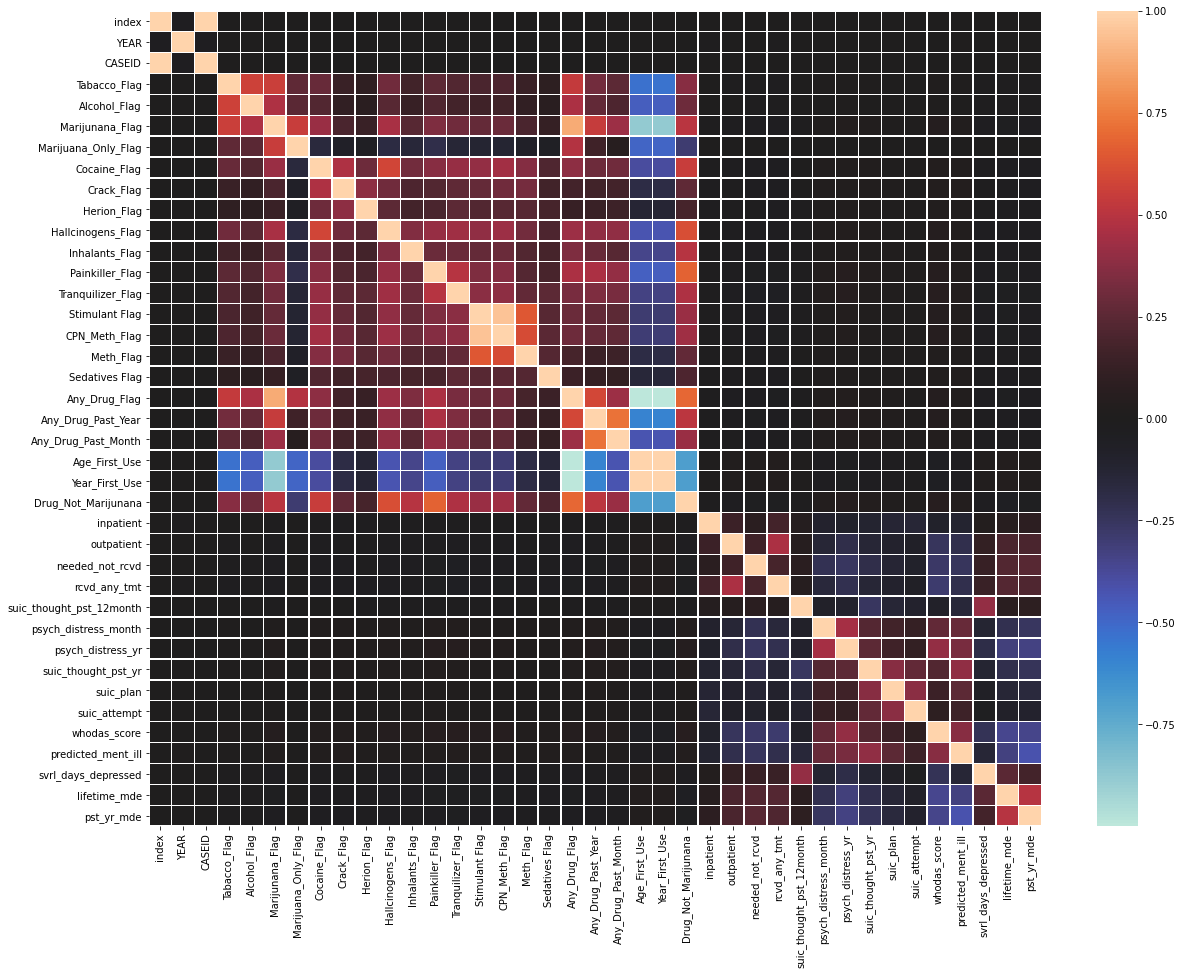

In [33]:
plt.subplots(figsize=(20,15))
sns.heatmap(data.corr(), center = 0, linewidths = 0.5)

<AxesSubplot:>

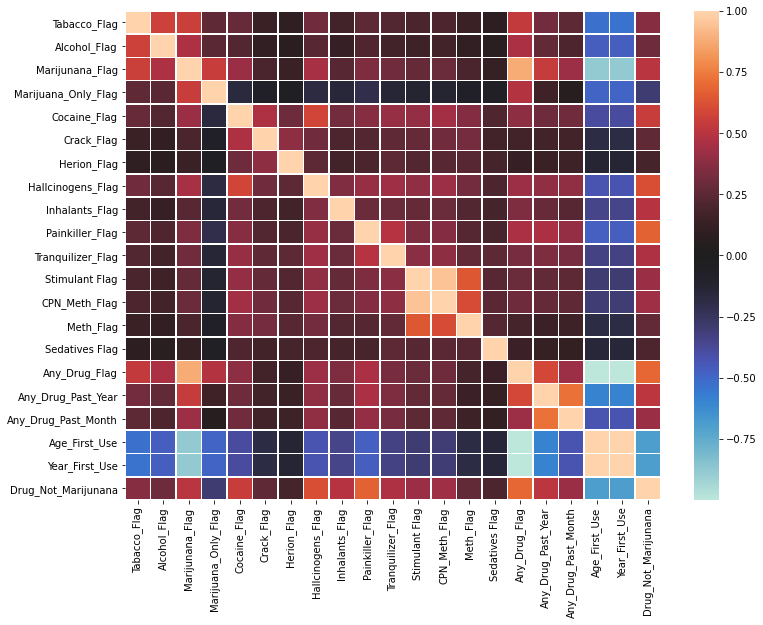

In [34]:
plt.subplots(figsize=(12,9))
sns.heatmap(subset1.corr(), center = 0, linewidths = 0.5)

In [36]:
fixed_subset = subset1[['SNRLGSVC', 'SNRLGIMP', 'SNRLDCSN', 'SNRLFRND',
                'Tabacco_Flag', 'Alcohol_Flag', 'Marijunana_Flag',
       'Marijuana_Only_Flag', 'Cocaine_Flag', 'Crack_Flag', 'Herion_Flag',
       'Hallcinogens_Flag', 'Inhalants_Flag', 'Painkiller_Flag',
       'Tranquilizer_Flag', 'Stimulant Flag', 'Meth_Flag',
       'Sedatives Flag','Drug_Not_Marijunana', 'Ever_Steal_50', 'Sell_Illegal_Drugs',
       'Ever_Booked_Arrested', 'Drug_or_Alc_Past_year']]

<AxesSubplot:>

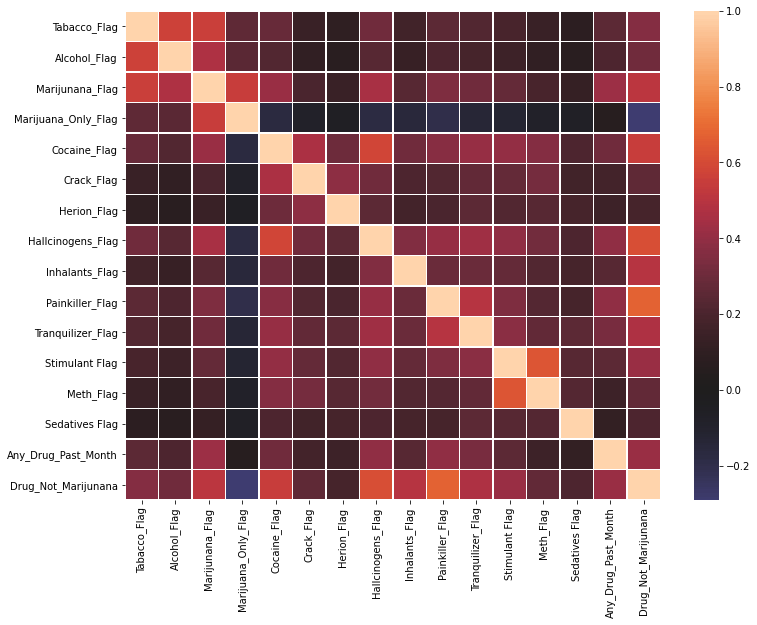

In [37]:
plt.subplots(figsize=(12,9))
sns.heatmap(fixed_subset.corr(), center = 0, linewidths = 0.5)

In [ ]:
#dropped columns
#Age_first_use, year_, cpn_meth_flag, any_drug_flag, any_drug_past_year, any 

In [27]:
subset2 = data[['inpatient',
       'outpatient', 'needed_not_rcvd', 'rcvd_any_tmt',
       'suic_thought_pst_12month', 'psych_distress_month', 'psych_distress_yr',
       'suic_thought_pst_yr', 'suic_plan', 'suic_attempt', 'whodas_score',
       'predicted_ment_ill', 'svrl_days_depressed', 'lifetime_mde',
       'pst_yr_mde', 'CATAG6', 'HEALTH', 'IRSEX', 'IRMARIT', 'EDUCCAT2',
       'NEWRACE2', 'EMPSTATY']]

<AxesSubplot:>

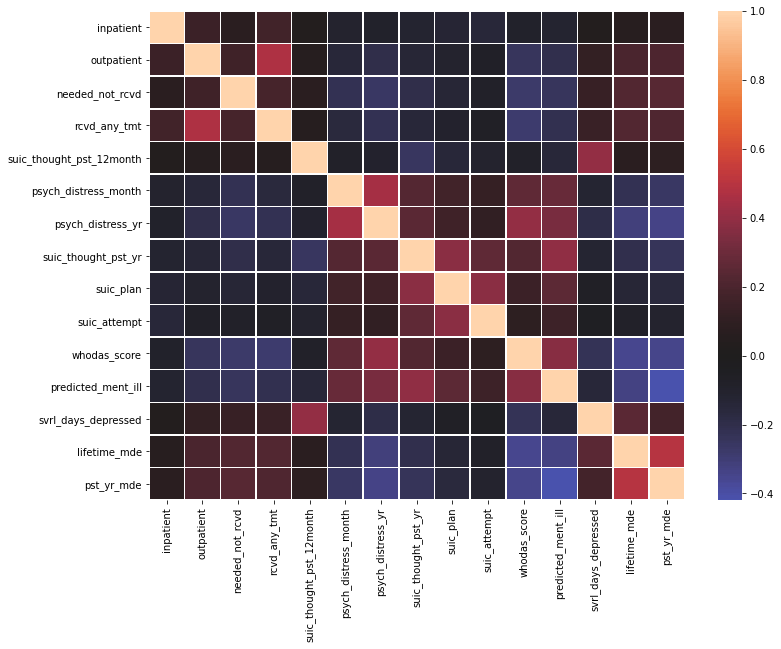

In [28]:
plt.subplots(figsize=(12,9))
sns.heatmap(subset2.corr(), center = 0, linewidths = 0.5)